# Optimized Customer Grouping and their Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('ifood_df.csv')

In [3]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [4]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

### Data Exploration and Cleaning

In [5]:
df.shape

(2205, 39)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [7]:
print(df.describe())

              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.130468   
min       0.000000 

In [8]:
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [9]:
df.dtypes

Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow             int64
educatio

In [10]:
df.duplicated().sum()

184

In [11]:
df=df.drop_duplicates()

In [12]:
df.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

### Descriptive Statistics

In [13]:
df.loc[:, 'TotalSpend'] = df[['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']].sum(axis=1)

In [14]:
#Calculate average spending across all product categories
product_columns = ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']
df['Avg_Spend'] = df[product_columns].mean(axis=1)#add the new column

print('Average Total Spend', df['TotalSpend'].mean())


Average Total Spend 607.7110341415141


In [15]:
print('Average Purchase Value by Category\n', df[product_columns].mean())

Average Purchase Value by Category
 MntFishProducts      37.603662
MntMeatProducts     166.059871
MntFruits            26.364671
MntSweetProducts     27.268679
MntWines            306.492331
MntGoldProds         43.921821
dtype: float64


In [16]:
#Frequency of purchases (average number of purchases through different channels)
purchase_columns = ['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth']
purchase_frequencies = df[purchase_columns].mean()
print('Average Frequency of Purchases\n', purchase_frequencies)

Average Frequency of Purchases
 NumDealsPurchases      2.330035
NumCatalogPurchases    2.644730
NumStorePurchases      5.807521
NumWebPurchases        4.115289
NumWebVisitsMonth      5.340426
dtype: float64


In [17]:
avg_recency = df['Recency'].mean()
print('Average Recency ', avg_recency)

Average Recency  48.880752102919345


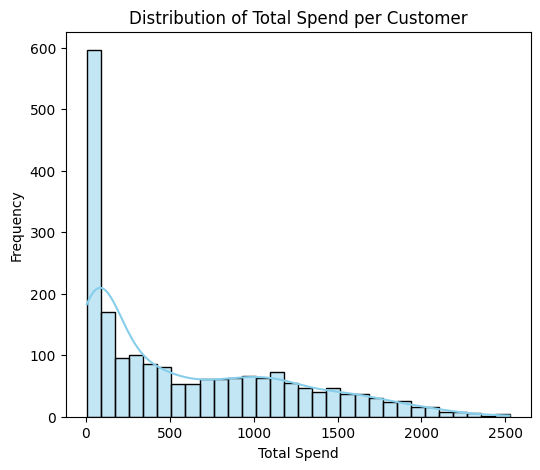

In [18]:
plt.figure(figsize=(6, 5))
sns.histplot(df['TotalSpend'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Total Spend per Customer")
plt.xlabel("Total Spend")
plt.ylabel("Frequency")
plt.show()

*The histogram depicts the distribution of total spend per customer, revealing a right-skewed pattern. The majority of customers spend under $500, while a smaller percentage spends between $500 and $1,000, with even fewer spending above $1,000. This indicates that a few customers significantly contribute to overall spending, a common characteristic in retail sales data.*

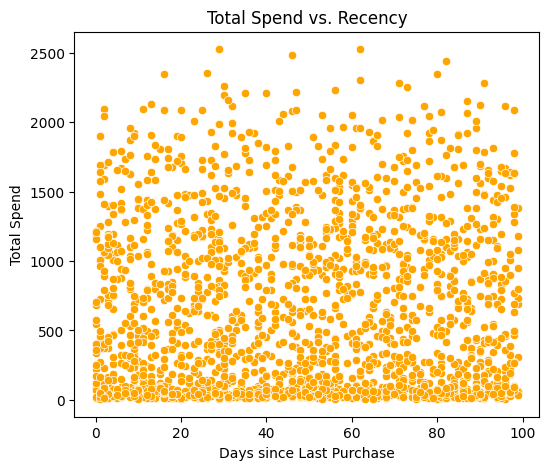

In [19]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x='Recency', y='TotalSpend', data=df, color='orange')
plt.title("Total Spend vs. Recency")
plt.xlabel("Days since Last Purchase")
plt.ylabel("Total Spend")
plt.show()

*The scatter plot visualizes the relationship between customer spending and recency. While there's no clear linear correlation, it suggests that recency isn't a strong predictor of total spend. The data is more concentrated in the lower-left corner, indicating more recent, smaller purchases.*

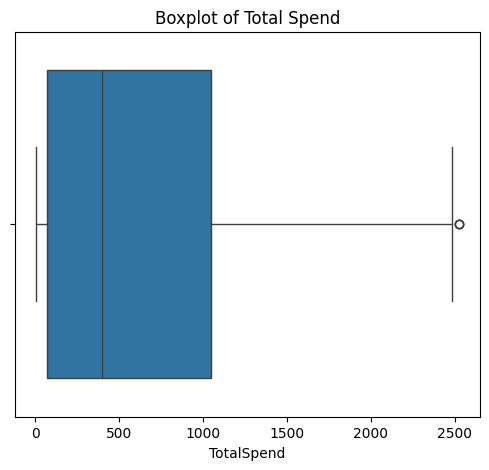

In [20]:
plt.figure(figsize=(6, 5))
sns.boxplot(x=df['TotalSpend'])
plt.title("Boxplot of Total Spend")
plt.show()

*The boxplot illustrates the distribution of total spend. The median is around 500, with most values falling between 250 and 1000. An outlier exists, indicating an exceptionally high spending value.*

### Customer Segmentation

Prepare the Data for Clustering

In [21]:
# Selecting relevant features for clustering
features = df[['TotalSpend', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 
               'NumCatalogPurchases', 'NumStorePurchases']]

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Determine the Optimal Number of Clusters Using the Elbow Method

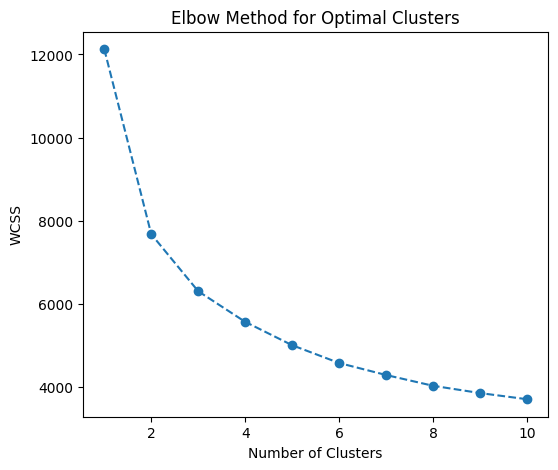

In [22]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(6, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


*The elbow curve helps determine the optimal number of clusters for K-Means. The elbow point, where the curve bends, suggests 4 or 5 clusters as the ideal choice.*

Apply K-means Clustering with the Optimal Number of Clusters

In [23]:
# Applying K-means with the optimal number of clusters
optimal_clusters = 4  # Replace with the number determined from the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


Analyze and Visualize the Segments

In [24]:
# Calculate mean values for each feature per cluster
cluster_analysis = df.groupby('Cluster').mean()
print("Average values per feature by cluster:")
print(cluster_analysis)


Average values per feature by cluster:
               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        36101.334615  0.701923  0.471154  24.511538   58.336538   6.667308   
1        73292.540419  0.044910  0.342814  49.595808  632.940120  57.356287   
2        54010.084986  0.433428  0.898017  47.070822  392.138810  23.317280   
3        36796.414583  0.725000  0.497917  75.616667   58.035417   6.814583   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0              27.496154         9.709615          6.096154     18.351923   
1             389.773952        84.282934         60.137725     73.497006   
2             131.912181        28.702550         23.495751     60.308782   
3              29.947917         9.406250          7.237500     18.412500   

         ...  education

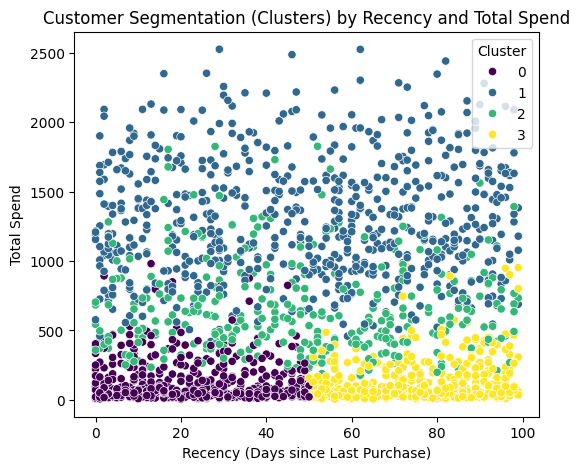

In [25]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x='Recency', y='TotalSpend', hue='Cluster', data=df, palette='viridis')
plt.title("Customer Segmentation (Clusters) by Recency and Total Spend")
plt.xlabel("Recency (Days since Last Purchase)")
plt.ylabel("Total Spend")
plt.legend(title="Cluster")
plt.show()


*The scatter plot segments customers into four clusters based on recency and total spend. Cluster 0 represents high-value customers, while Cluster 2 indicates potential churn risks. Targeted strategies can be applied to each cluster to optimize customer engagement and revenue.*

In [26]:
cluster_counts = df['Cluster'].value_counts()
print("Number of customers per cluster:")
print(cluster_counts)


Number of customers per cluster:
Cluster
1    668
0    520
3    480
2    353
Name: count, dtype: int64


### Illustrate customer segments through visualization

C:\Users\Muhammad Faiq\AppData\Local\Temp\ipykernel_15344\2477882678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Income', data=df, palette='viridis')


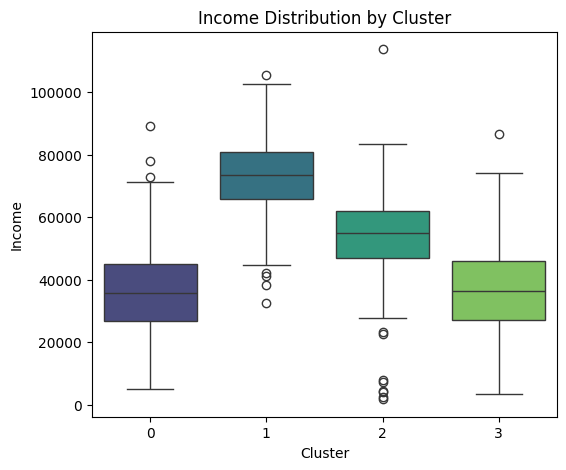

In [27]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Cluster', y='Income', data=df, palette='viridis')
plt.title("Income Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Income")
plt.show()

*The boxplot illustrates the income distribution across four clusters. Cluster 1 has the highest median income, while Cluster 0 has the lowest. The varying income levels suggest different socioeconomic segments within the clusters.*

C:\Users\Muhammad Faiq\AppData\Local\Temp\ipykernel_15344\1297315754.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Cluster',data=df, palette='viridis')


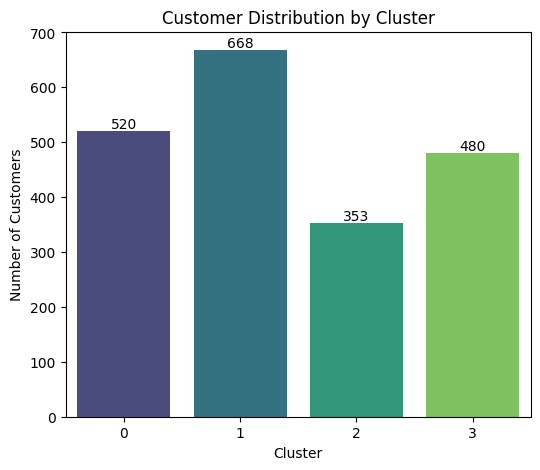

In [28]:
plt.figure(figsize=(6,5))
ax=sns.countplot(x='Cluster',data=df, palette='viridis')
plt.title("Customer Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
for bars in ax.containers:
    ax.bar_label(bars)


*The bar chart shows the distribution of customers across four clusters. Cluster 1 has the highest number of customers (668), while Cluster 2 has the lowest (353). This visualization helps understand the size and composition of each customer segment.*

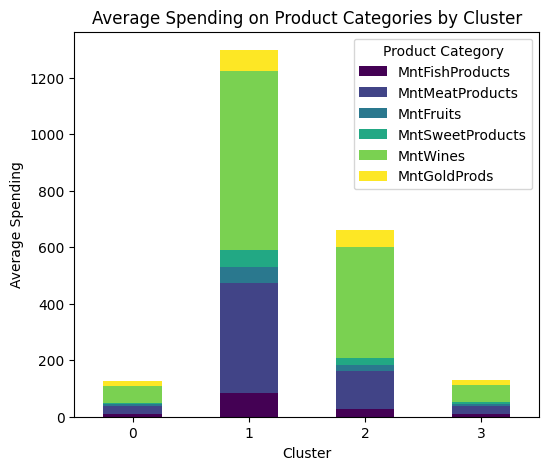

In [29]:
cluster_spending = df.groupby('Cluster')[['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']].mean()
cluster_spending.plot(kind='bar', stacked=True, figsize=(6, 5), colormap='viridis')
plt.title("Average Spending on Product Categories by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Spending")
plt.xticks(rotation=0)
plt.legend(title="Product Category")
plt.show()


*The stacked bar chart visualizes the average spending on different product categories across four customer clusters. Cluster 1 has the highest average spending on most product categories, while Cluster 2 has the lowest. This analysis helps identify product preferences and spending patterns within each customer segment.*

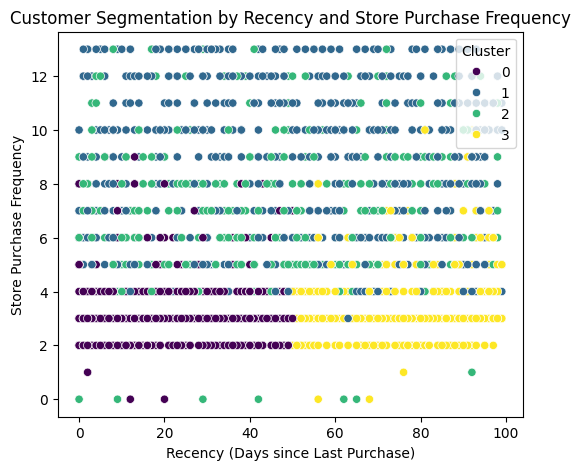

In [30]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x='Recency', y='NumStorePurchases', hue='Cluster', data=df, palette='viridis')
plt.title("Customer Segmentation by Recency and Store Purchase Frequency")
plt.xlabel("Recency (Days since Last Purchase)")
plt.ylabel("Store Purchase Frequency")
plt.legend(title="Cluster")
plt.show()


*The scatter plot segments customers into four clusters based on recency (days since last purchase) and store purchase frequency. Cluster 0 represents customers with low recency and low purchase frequency, while Cluster 3 indicates high recency and high purchase frequency. This segmentation helps identify customer segments with distinct behavioral patterns.*

C:\Users\Muhammad Faiq\AppData\Local\Temp\ipykernel_15344\2617841306.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='NumStorePurchases', data=df, palette='viridis')


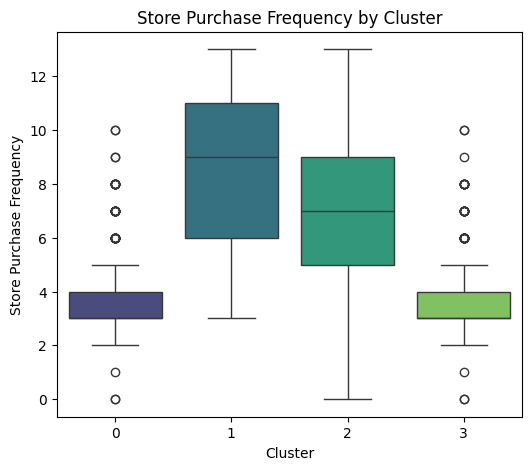

In [31]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='Cluster', y='NumStorePurchases', data=df, palette='viridis')
plt.title("Store Purchase Frequency by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Store Purchase Frequency")
plt.show()



*The boxplot shows the distribution of store purchase frequency across four customer clusters. Cluster 1 has the highest median purchase frequency, while Cluster 0 has the lowest. This visualization helps identify clusters with distinct shopping habits and preferences.*

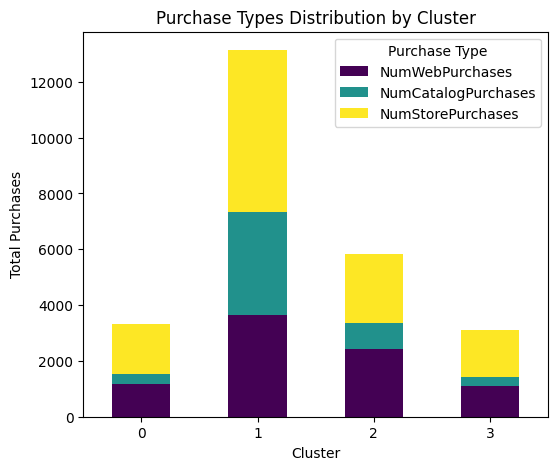

In [32]:
purchase_types = df.groupby('Cluster')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()
purchase_types.plot(kind='bar', stacked=True, figsize=(6, 5), colormap='viridis')
plt.title("Purchase Types Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Total Purchases")
plt.xticks(rotation=0)
plt.legend(title="Purchase Type")
plt.show()


*The stacked bar chart visualizes the distribution of purchase types (web, catalog, and store) across four customer clusters. Cluster 1 has the highest number of purchases across all channels, while Cluster 0 has the lowest. This analysis helps identify preferred shopping channels for each customer segment.*

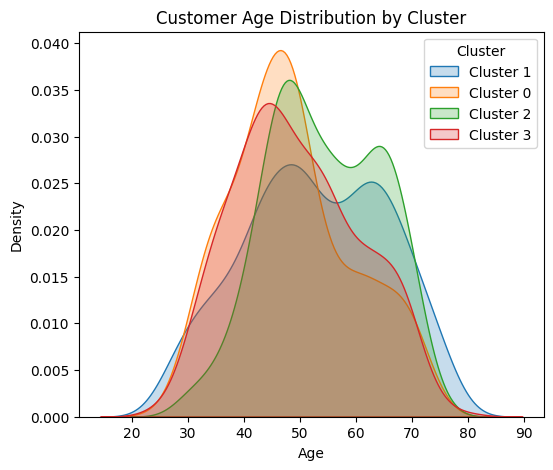

In [33]:
plt.figure(figsize=(6, 5))
for cluster in df['Cluster'].unique():
    sns.kdeplot(df[df['Cluster'] == cluster]['Age'], label=f'Cluster {cluster}', fill=True)
plt.title("Customer Age Distribution by Cluster")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend(title="Cluster")
plt.show()


*The density plot shows the distribution of customer ages across four clusters. Cluster 0 and 1 have a similar age distribution, with a peak around 50 years old. Cluster 2 has a slightly older customer base, while Cluster 3 has a younger customer base. This analysis helps identify age-related preferences and behaviors within each cluster.*

### Key Insights

**Spending Distribution:** The spending distribution shows a right-skewed pattern where most customers spend less than $500, with fewer spending over $1,000. This pattern indicates that a small segment of high-spending customers contributes significantly to overall revenue.

**Customer Segments:** K-means clustering identified four distinct customer segments:

High-Value Customers (Cluster 0): These customers show high spending and relatively recent purchases, making them valuable for loyalty and upsell campaigns.

Potential Churn Risks (Cluster 2): Customers in this group have low spending and high recency, indicating a risk of churn and an opportunity for re-engagement efforts.

Frequent Shoppers (Cluster 3): Customers with frequent purchases but moderate spending, showing strong engagement and potential for cross-selling.

Low-Engagement Segment (Cluster 1): This group has low spending and low recency, indicating minimal engagement and lower priority for high-investment retention strategies.

**Product Preferences by Segment:** High-value customers tend to spend more on premium products (e.g., wine and gold), while lower-engagement clusters show a preference for lower-cost items. This preference suggests opportunities for product-specific marketing.

**Channel Preferences:** Cluster analysis of purchase types reveals that certain segments favor specific channels. For instance, higher-value customers show a higher tendency toward store and catalog purchases, while younger customers lean towards web purchases, which can inform channel-specific marketing strategies.

**Age-Related Patterns:** Customer age distribution varies by segment, with high-spending customers typically older and younger customers showing frequent, smaller purchases. This age-based insight suggests opportunities for tailored marketing by age group.

**Income and Socioeconomic Variation:** Median income varies across clusters, with certain clusters indicating higher socioeconomic status. High-income segments demonstrate stronger purchasing power and a preference for premium products, ideal for targeting upscale marketing campaigns.

**Engagement Frequency:** Clusters show varying engagement levels in terms of recency and purchase frequency. Frequent purchasers within recent recency are prime candidates for loyalty programs, while clusters with low engagement and long recency may benefit from reactivation strategies.

### Conclusion


The customer segmentation analysis reveals that spending patterns are right-skewed, with a small portion of high-spending customers contributing significantly to overall revenue. Cluster analysis using K-means identified distinct groups: high-value, engaged customers, potential churn risks, and younger, frequent shoppers. Each segment demonstrates unique behaviors in spending, preferred product categories, and shopping channels. For instance, high-income clusters show a preference for premium products, while lower-engagement clusters lean toward minimal purchases. These insights guide targeted marketing strategies, such as loyalty programs for high-value customers and retention campaigns for those at risk of churning, enhancing customer satisfaction and business revenue.

### Recommendations

**Enhance Loyalty Programs for High-Value Customers:** Introduce exclusive loyalty programs and rewards specifically for high-spending customers. Offer benefits like early access to new products, personalized discounts, and special events to increase retention and lifetime value.

**Develop Re-engagement Campaigns for At-Risk Customers:** For segments with high recency and low spend, launch targeted re-engagement efforts, such as time-limited discounts, personalized offers, and reminder emails, to encourage their return and boost purchase frequency.

**Implement Cross-Selling for Frequent Shoppers:** Use cross-sell and upsell strategies tailored to frequent shoppers by suggesting complementary items and premium options based on past purchases. This can drive higher basket sizes and introduce customers to new product lines.

**Targeted Product Promotions by Segment:** Align marketing promotions to the spending habits and preferences of each customer segment. Promote affordable items to lower-spending customers, while showcasing premium products to higher-spending segments to increase relevance and conversions.

**Channel-Specific Engagement Strategies:** For customers with a preference for specific shopping channels (web, catalog, store), create channel-targeted campaigns to improve their experience. For example, offer digital promotions to online shoppers and in-store events for those who prefer physical shopping.

**Personalize Campaigns by Age Group:** Craft age-specific messaging and promotions to address the preferences of different age groups. Younger segments may appreciate social media engagement and time-sensitive deals, while older customers might value loyalty rewards and personalized customer service.